In [2]:
import pandas as pd

df = pd.read_csv("cars24data.csv")
df

,Model_Name,Price,Manufacturing_year,Engine_capacity,Spare_key,Transmission,KM_driven,Ownership,Fuel_type,Imperfections,Repainted_Parts
0,2017 Maruti Swift VXI,561000,2017,1197,No,Manual,25847,2,Petrol,6,2
1,2016 Maruti Baleno DELTA PETROL 1.2,498000,2016,1197,Yes,Manual,55511,2,Petrol,12,1
2,2020 Maruti Swift VXI,577000,2020,1197,No,Manual,47110,1,Petrol,4,2
3,2022 Maruti Ertiga VXI AT SHVS,1084000,2022,1462,Yes,Automatic,35378,1,Petrol,2,3
4,2019 Maruti Dzire VXI,603000,2019,1197,Yes,Manual,91856,1,Petrol,3,2
...,...,...,...,...,...,...,...,...,...,...,...
1440,2021 Maruti Ertiga VXI SHVS,862000,2021,1462,No,Manual,19901,1,Petrol,1,0
1441,2015 Maruti Ciaz ZXI,507000,2015,1373,No,Manual,50022,1,Petrol,5,2
1442,2019 Maruti Baleno DELTA PETROL 1.2,554000,2019,1197,Yes,Manual,58679,1,Petrol,24,4
1443,2017 Maruti Ciaz S 1.4 MT PETROL,557000,2017,1373,Yes,Manual,73948,2,Petrol,4,5


In [3]:
#Overview
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1445 entries, 0 to 1444
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Model_Name          1445 non-null   object
 1   Price               1445 non-null   int64 
 2   Manufacturing_year  1445 non-null   int64 
 3   Engine_capacity     1445 non-null   int64 
 4   Spare_key           1445 non-null   object
 5   Transmission        1445 non-null   object
 6   KM_driven           1445 non-null   int64 
 7   Ownership           1445 non-null   int64 
 8   Fuel_type           1445 non-null   object
 9   Imperfections       1445 non-null   int64 
 10  Repainted_Parts     1445 non-null   int64 
dtypes: int64(7), object(4)
memory usage: 124.3+ KB


,Price,Manufacturing_year,Engine_capacity,KM_driven,Ownership,Imperfections,Repainted_Parts
count,1.445000e+03,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000
mean,5.263543e+05,2017.817301,1142.104498,50588.903114,1.285121,9.597232,3.228374
std,1.963696e+05,2.986554,169.020818,27339.562631,0.489877,8.398637,3.364578
min,1.390000e+05,2010.000000,796.000000,1207.000000,1.000000,0.000000,0.000000
25%,3.900000e+05,2016.000000,998.000000,28803.000000,1.000000,3.000000,0.000000
50%,5.010000e+05,2018.000000,1197.000000,47849.000000,1.000000,8.000000,2.000000
75%,6.310000e+05,2020.000000,1197.000000,70337.000000,2.000000,14.000000,5.000000
max,1.599000e+06,2023.000000,1462.000000,124716.000000,3.000000,43.000000,27.000000


In [4]:
#Null value Check
df.isnull().sum()

Model_Name            0
Price                 0
Manufacturing_year    0
Engine_capacity       0
Spare_key             0
Transmission          0
KM_driven             0
Ownership             0
Fuel_type             0
Imperfections         0
Repainted_Parts       0
dtype: int64

In [16]:
#Total Cars and Avg Price
df.shape[0], df['Price'].mean()

(1445, 526354.3252595155)

In [13]:
#Average Price by Transmission
df.groupby('Transmission')['Price'].mean().round()

Transmission
Automatic    601339.0
Manual       500358.0
Name: Price, dtype: float64

In [17]:
#Cars without Spare Key
df[df['Spare_key'] == 'No'].shape[0]

537

In [18]:
#Top 10 Expensive Cars
df[['Model_Name', 'Price']].sort_values(by='Price', ascending=False).head(10)

,Model_Name,Price
1056,2022 Maruti Grand Vitara ALPHA SMART HYBRID AL...,1599000
498,2022 Maruti XL6 ALPHA PLUS AT,1408000
1170,2023 Maruti Ertiga ZXI+ AT SHVS,1364000
594,2022 Maruti XL6 ALPHA PLUS AT DUAL TONE,1288000
494,2023 Maruti XL6 ALPHA PLUS MT,1258000
359,2023 Maruti BREZZA ZXI SMART HYBRID,1231000
243,2023 Maruti XL6 ZETA CNG,1228000
347,2023 Maruti XL6 ZETA CNG,1225000
929,2023 Maruti BREZZA ZXI SMART HYBRID,1220000
564,2022 Maruti XL6 ALPHA PLUS MT,1220000


In [19]:
#Group by Fuel Type
df['Fuel_type'].value_counts()

Petrol    1264
CNG        109
Diesel      72
Name: Fuel_type, dtype: int64

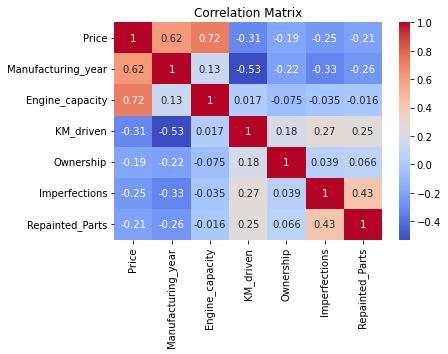

In [21]:
#Correlation Heatmap
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

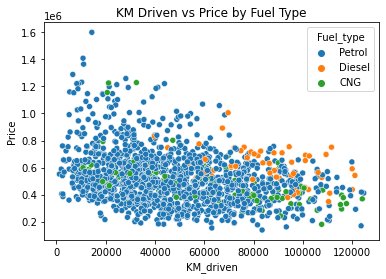

In [25]:
#Scatter Plot: KM Driven vs Price
sns.scatterplot(data=df, x='KM_driven', y='Price', hue='Fuel_type')
plt.title('KM Driven vs Price by Fuel Type')
plt.show()

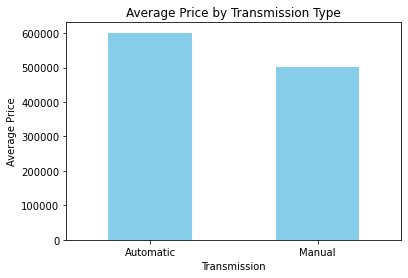

In [26]:
#Bar Chart: Transmission vs Average Price
df.groupby('Transmission')['Price'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Price by Transmission Type')
plt.ylabel('Average Price')
plt.xticks(rotation=0)
plt.show()

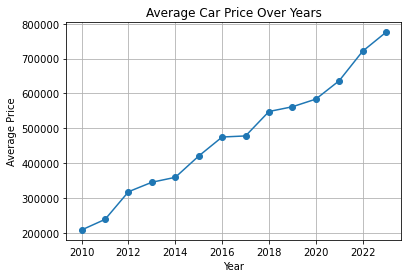

In [31]:
#Line Plot: Average Price per Year
df.groupby('Manufacturing_year')['Price'].mean().plot(marker = 'o')
plt.title('Average Car Price Over Years')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()